In [8]:
import pandas as pd

In [23]:
datasets_path = lambda  file_name: f'/Users/stijnvanleeuwen/Desktop/codes/EUR/Ass2/datasets/{file_name}.parquet'

baskets = pd.read_parquet(datasets_path('baskets')).astype({'week':'uint8', 'customer':'uint','product':'category', 'price':'uint16'}) 
coupons = pd.read_parquet(datasets_path('coupons')).astype({'week':'uint8', 'customer':'uint','product':'category', 'discount':'uint8'})
prediction_index = pd.read_parquet(datasets_path('prediction_index')).astype({'week':'uint8', 'customer':'category','product':'category'}) 

In [24]:
baskets = baskets[baskets['customer']<2000].astype({'customer':'category'})
coupons = coupons[coupons['customer']<2000].astype({'customer':'category'})

In [28]:
coupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 0 to 44509999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   week      900000 non-null  uint8   
 1   customer  900000 non-null  category
 2   product   900000 non-null  category
 3   discount  900000 non-null  uint8   
dtypes: category(2), uint8(2)
memory usage: 12.1 MB


In [25]:
customer = 0

basket = baskets[baskets['customer']==customer].reset_index(drop=True).drop('customer', axis=1)
coupon = coupons[coupons['customer']==customer].reset_index(drop=True).drop('customer', axis=1)

In [89]:
for i in range(250):
    coupon.loc[:,i] = 0
    
for i in range(len(coupon)):
    prod =  coupon.iloc[i,1]

    try:
        coupon.iloc[i,3+prod] = 1
    except:
        print('staak')
        
coupon.columns = coupon.columns.astype('str')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


In [129]:
for i in range(250):
    coupon[str(i)] = coupon[str(i)].cumsum()

<AxesSubplot:>

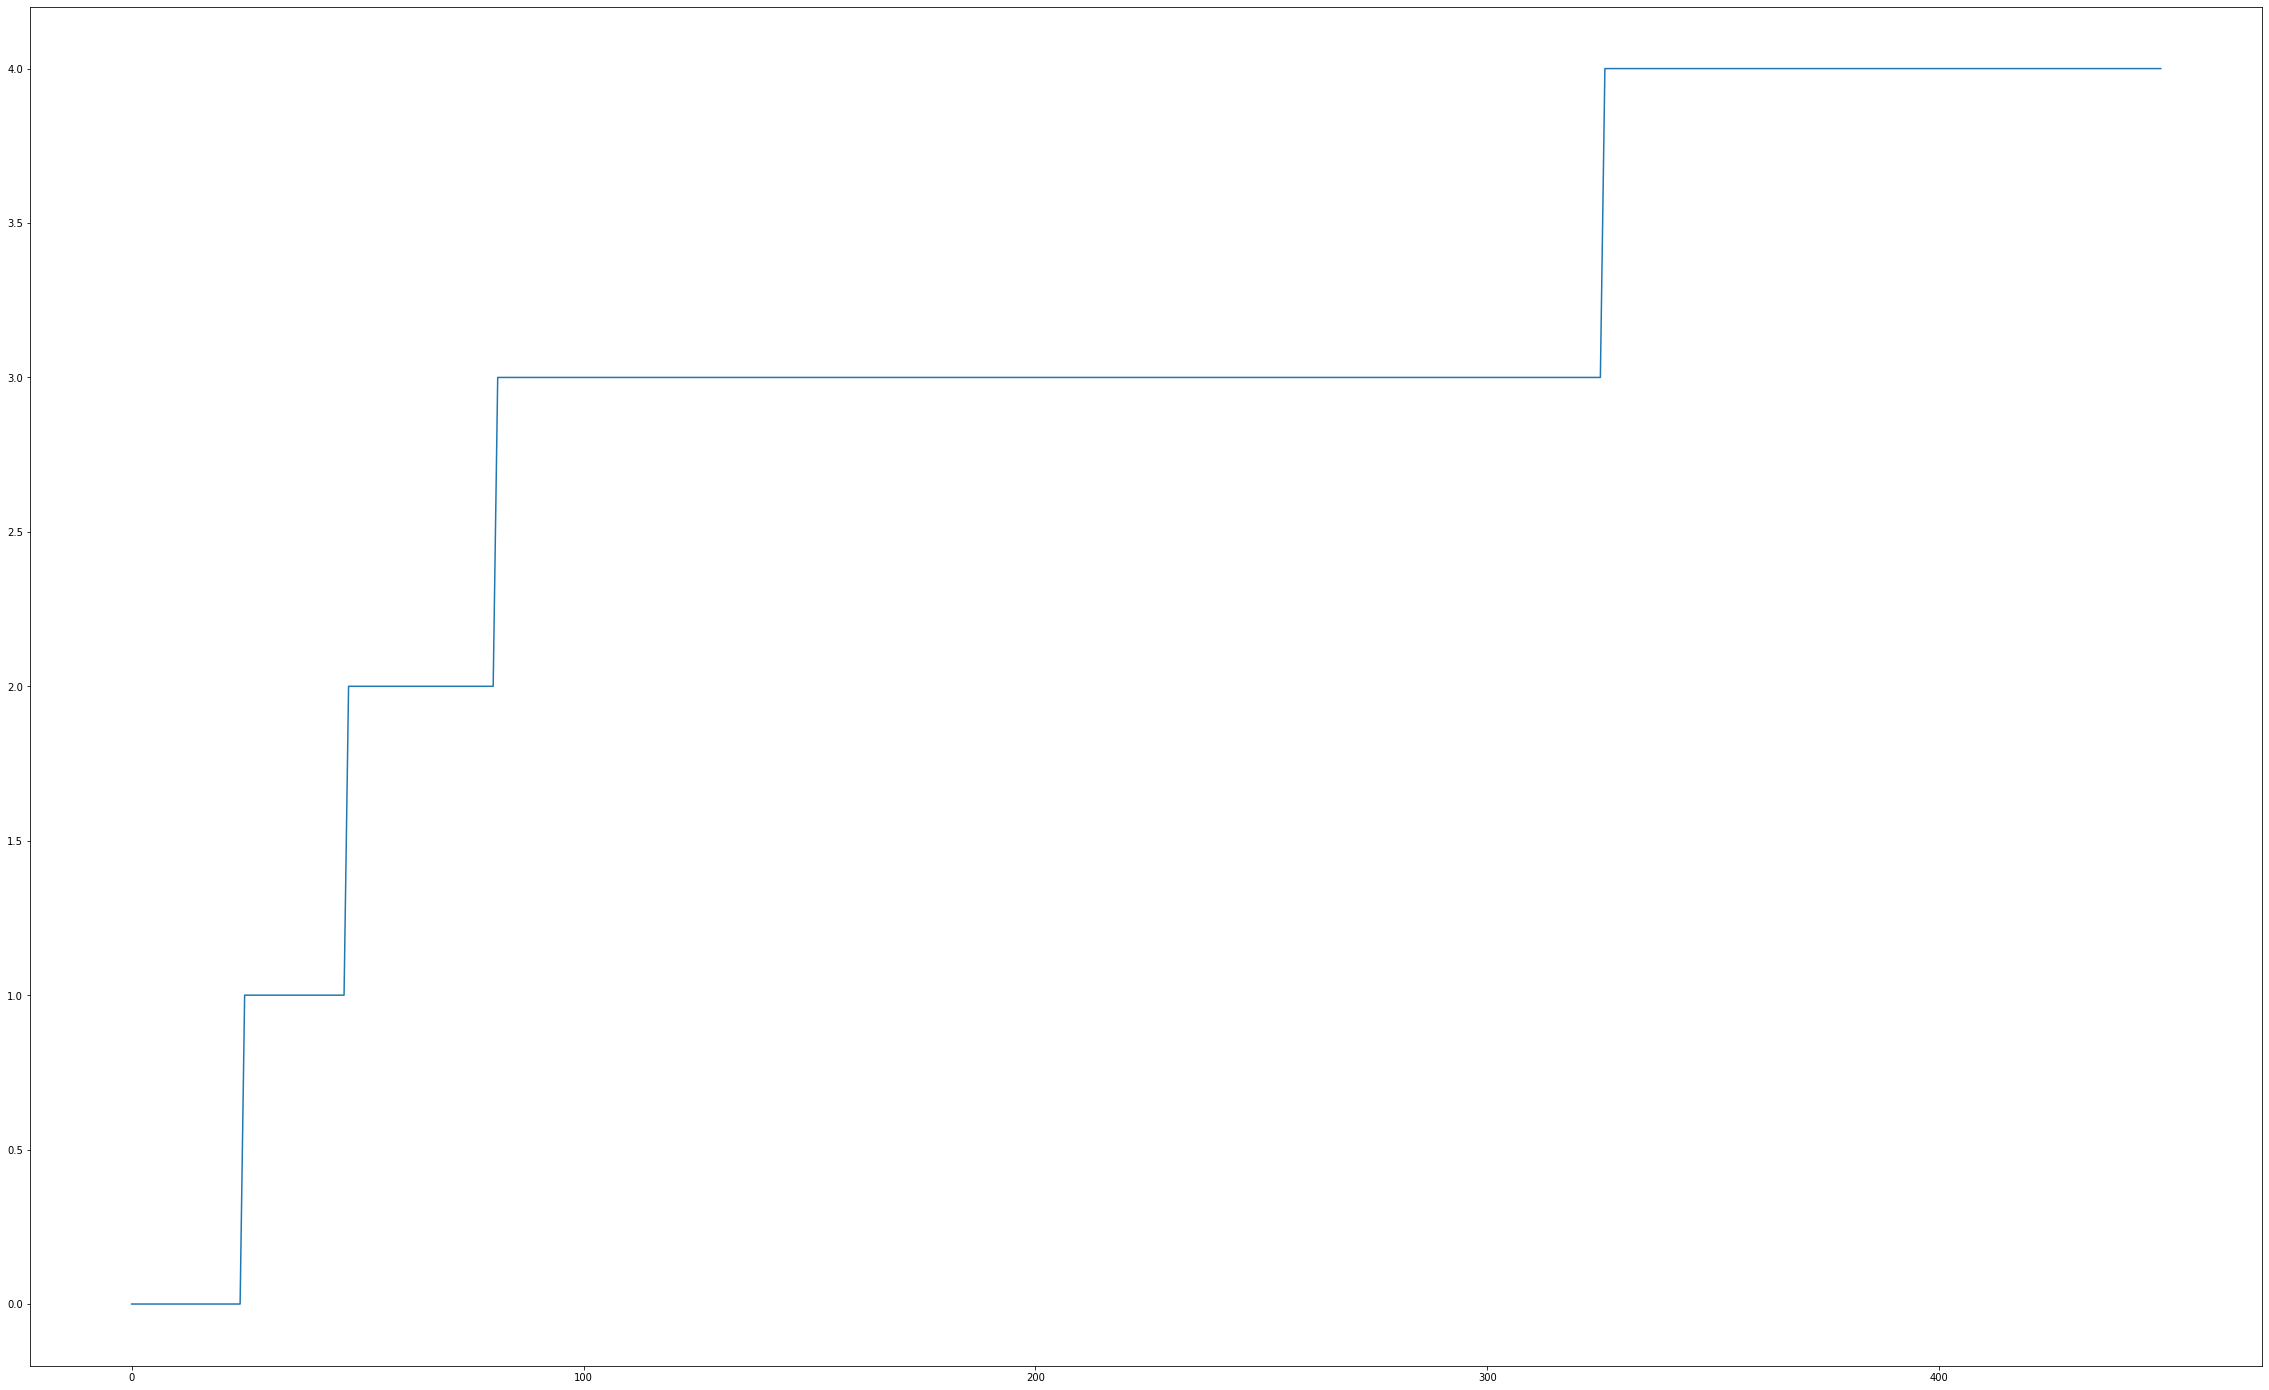

In [155]:
coupon.iloc[:,16].plot(figsize=(40,25))

In [17]:
'''
co-occurency matrix

identify blocks of zeros 
there are 25 clusters

basket id  (pair of customer and week)

1 . same prod 
2. same cat 
3. just past 

Customer
Product
Customer - Product
Category


'''

'\nco-occurency matrix\n\nidentify blocks of zeros \nthere are 25 clusters\n\nbasket id  (pair of customer and week)\n\n1 . same prod \n2. same cat \n3. just past \n'

In [61]:
baskets['week']

0            0
1            0
2            0
3            0
4            0
            ..
68091869    89
68091870    89
68091871    89
68091872    89
68091873    89
Name: week, Length: 1378720, dtype: uint8

In [69]:
baskets

,week,customer,product,price
0,0,0,71,629
1,0,0,91,605
2,0,0,116,715
3,0,0,123,483
4,0,0,157,592
...,...,...,...,...
68091869,89,1999,144,562
68091870,89,1999,158,566
68091871,89,1999,192,549
68091872,89,1999,213,592
